In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sys
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [52]:
df = pd.read_csv("DataOpt/Final_join_prueba.csv")
df_original = pd.read_csv("DataOpt/Final_dataset_join.csv")

In [306]:
dff = pd.read_excel("../Archivos Generados/DatasetFinalPrueba.xlsx")

In [5]:
# Funciones

# Funcion para Normalizar la Vista minable a exepción de la etiqueta(Variable Objetivo)
def EncoderViewMinable(df):
    new_dataset = df
    norm = MinMaxScaler()
    norm = norm.fit(new_dataset.values[:,:])
    valMin = norm.data_min_
    valMax = norm.data_max_
    dataRange = norm.data_range_
    #df_norm = norm.fit_transform(df.values[:,:-1])

    return [valMin, valMax, dataRange]




'''
Funcion para generar el vector de pesos aleatorio.
Entradas:
w: Vector de pesos w [0,1], igual al numero de caracteristicas normalizadas.
nc: Nunero de ceros que debe contener el vector de pesos [10,20,30,40,50]
'''


def GenerateWeightVector(w, nc):
    posceros = np.random.choice(len(w), nc, replace=False)
    w[posceros] = 0
    s  = np.sum(w)
    wf = w/s
    return wf




# Funcion para Normalizar la Vista minable a exepción de la etiqueta(Variable Objetivo)
# df: es la matriz df.values [] , no incluye la etiqueta del grupo
def NormalizeViewMinable(df,valMin, dataRange):
    dataset_normalizado = np.empty((df.shape[0], df.shape[1]))
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            dataset_normalizado[i][j]= (df[i][j] - valMin[j])/dataRange[j]

    return dataset_normalizado

In [53]:
#Lectura de los Encoders
valMin = np.loadtxt('DataOpt/Encoder_ValMin.txt')
print("Encoder: ", len(valMin))
dataRange = np.loadtxt('DataOpt/Encoder_dataRange.txt')

#2. Normalizamos los datos
df_normalizado = NormalizeViewMinable(df.values[:, :-1],valMin, dataRange)
print(df_normalizado)
# Normalizo datos df original
df_norm_org =  NormalizeViewMinable(df_original.values[:, :-1],valMin, dataRange)

Encoder:  174
[[0.26666667 0.3559322  0.64179104 ... 0.         1.         0.        ]
 [0.33333333 0.3559322  0.3880597  ... 0.         1.         0.        ]
 [0.26666667 0.33898305 0.47761194 ... 0.         1.         0.        ]
 ...
 [0.33333333 0.33898305 0.6119403  ... 0.         1.         0.        ]
 [0.26666667 0.37288136 0.55223881 ... 0.         1.         0.        ]
 [0.33333333 0.3559322  0.40298507 ... 0.         1.         0.        ]]


In [16]:
df_normalizado

array([[0.26666667, 0.3559322 , 0.64179104, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.3559322 , 0.3880597 , ..., 0.        , 1.        ,
        0.        ],
       [0.26666667, 0.33898305, 0.47761194, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.33333333, 0.33898305, 0.6119403 , ..., 0.        , 1.        ,
        0.        ],
       [0.26666667, 0.37288136, 0.55223881, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.3559322 , 0.40298507, ..., 0.        , 1.        ,
        0.        ]])

In [54]:
# 3 Generar vector de pesos
#np.random.seed(0)
vp = np.random.rand(174)
print("Vector de pesos Original: ", vp)
wi = GenerateWeightVector(vp, 0)
#print(wi)
print("Suma vector de Pesos: ", sum(wi))

Vector de pesos Original:  [0.75034319 0.28783376 0.49497162 0.1862116  0.18839952 0.43584121
 0.73859222 0.52658426 0.88668322 0.8309088  0.03160544 0.56841904
 0.60916126 0.96157514 0.02323663 0.53110377 0.20478136 0.05366291
 0.58748852 0.77260414 0.77486545 0.03028841 0.4069464  0.04450963
 0.24783865 0.1928807  0.21518258 0.33911841 0.27741804 0.96227991
 0.35240712 0.89417252 0.18104167 0.76374687 0.06134554 0.46276123
 0.00551044 0.81029076 0.95048604 0.03510737 0.93384636 0.77385389
 0.35886158 0.90887655 0.29625727 0.40929531 0.09671126 0.65693896
 0.02960083 0.48490528 0.68319185 0.8212376  0.14994139 0.75409037
 0.71907702 0.55957053 0.5846446  0.09127072 0.60047104 0.38152221
 0.86758085 0.31309888 0.57659508 0.4265714  0.87626194 0.25391667
 0.07880236 0.74865572 0.41289662 0.58909836 0.02638933 0.95210979
 0.87761838 0.6238679  0.01702984 0.37797647 0.97879654 0.68133036
 0.16098786 0.46059675 0.96673774 0.53470817 0.02461453 0.61977208
 0.27121653 0.09884595 0.40290844 0

In [60]:
def qualityFunction(df_norm, wi,df,k):
    #print("longitud df_norm: ",len(df_norm))
    #print("Longitud wi: ", len(wi))
    y_pred = []
    for i in range(len(df_norm)):
        vrf = df_norm[i]
        print(f"Vector {i} :", vrf) 
        ListaPesosPonderados= [[sys.float_info.max,0] for a in range(k)]
        for j in range(len(df_norm)):
            if i != j:
                print(ListaPesosPonderados)
                ri = wi* np.power((df_norm[j] - vrf), 2)
                dE = np.sum(ri)
                print("Distancia Euclideana: ", dE)
                if dE < ListaPesosPonderados[k-1][0]:
                    ListaPesosPonderados[k-1][0]=dE
                    ListaPesosPonderados[k-1][1]=j
                    ListaPesosPonderados.sort(key=lambda x: x[0], reverse=False)
        print(f"vector {i} es muy similar a los vectores en la posición {ListaPesosPonderados}")

        grupos = []
        for i in range(len(ListaPesosPonderados)):
            index=ListaPesosPonderados[i][1]
            g = df.values[index][-1]
            grupos.append(g)
        
        print("Grupos asociados: ", grupos)
        grupoSelected = int(pd.Series(grupos).value_counts().index[0])
        print("Grupo seleccionado: ", grupoSelected)
        y_pred.append(grupoSelected)
    qs = accuracy_score(df.values[:,-1], y_pred)
    #mc = confusion_matrix(df.values[:,-1], y_pred)
    #print("Matriz de Confusión: ", mc)

    return [qs, y_pred]



def qualityFunctionOriginal(df_norm, wi,df):
    #print("longitud df_norm: ",len(df_norm))
    #print("Longitud wi: ", len(wi))
    y_pred = []
    for i in range(len(df_norm)):
        posMinDep = 0
        minDep = sys.float_info.max 
        vrf = df_norm[i]
        #print(f"vercor {i}: {vrf}")
        
        for j in range(len(df_norm)):
            if i != j:
                ri = wi* np.power((vrf- df_norm[j]), 2)   
                dE = np.sqrt(np.sum(ri))
                #print("dis: ",dE)
                if dE < minDep:
                    posMinDep=j
                    minDep = dE
        #print(posMinDep)
        grupo=df.values[posMinDep][-1]
        #print("Grupo: ", grupo)
        y_pred.append(grupo)
        #print(f"Posición {posMinDep} y distancia {minDep} hasta el momento")
    qs = accuracy_score(df.values[:,-1], y_pred)
    return [qs, y_pred]


In [91]:
# 3 Generar vector de pesos
#np.random.seed(0)

best_calidad = 0
for i in range(500):
    vp = np.random.rand(174)
    wi = GenerateWeightVector(vp, 0)
    print("Suma vector de Pesos: ", sum(wi))
    calidad = qualityFunctionOriginal(df_norm_org, wi,df_original)
    print(calidad[0])
    if calidad[0] > best_calidad:
        best_calidad = calidad[0] 

Suma vector de Pesos:  0.9999999999999998
0.37812911725955206
Suma vector de Pesos:  1.0
0.3662714097496706
Suma vector de Pesos:  1.0000000000000004
0.3702239789196311
Suma vector de Pesos:  1.0000000000000004
0.36495388669301715
Suma vector de Pesos:  0.9999999999999999
0.38866930171277997
Suma vector de Pesos:  0.9999999999999996
0.3662714097496706
Suma vector de Pesos:  0.9999999999999996
0.3675889328063241
Suma vector de Pesos:  1.0000000000000002
0.3544137022397892
Suma vector de Pesos:  0.9999999999999996
0.3438735177865613
Suma vector de Pesos:  0.9999999999999996
0.3557312252964427
Suma vector de Pesos:  1.0000000000000007
0.37417654808959155
Suma vector de Pesos:  1.0
0.3794466403162055
Suma vector de Pesos:  1.0000000000000002
0.37417654808959155
Suma vector de Pesos:  1.0
0.38866930171277997
Suma vector de Pesos:  0.9999999999999997
0.3715415019762846
Suma vector de Pesos:  0.9999999999999999
0.37285902503293805
Suma vector de Pesos:  0.9999999999999998
0.3715415019762846
S

KeyboardInterrupt: 

In [90]:
best_calidad

0.3715415019762846

In [84]:
calidad = qualityFunctionOriginal(df_norm_org, wi,df_original)


In [86]:
calidad[0]

0.3557312252964427

In [21]:
df.Grupo

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
Name: Grupo, dtype: int64

In [64]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [66]:
label = df['Grupo']
df_normalizado

array([[0.26666667, 0.3559322 , 0.64179104, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.3559322 , 0.3880597 , ..., 0.        , 1.        ,
        0.        ],
       [0.26666667, 0.33898305, 0.47761194, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.33333333, 0.33898305, 0.6119403 , ..., 0.        , 1.        ,
        0.        ],
       [0.26666667, 0.37288136, 0.55223881, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.3559322 , 0.40298507, ..., 0.        , 1.        ,
        0.        ]])

# PRUEBAS INTERVALOS DE CONFIANZA

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import mean_absolute_error,max_error,mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.regression.linear_model as linear_model
from statsmodels.tools.tools import pinv_extended  
from scipy import stats
import joblib


In [2]:
# Funciones
# Funciones para el calculo de la regresion Lineal
class LinearRegession():
    def __init__(self, df, alpha, l1_ratio):
        self.df = df
        self.alpha = alpha
        self.l1_ratio = l1_ratio
    

    def CalcularModeloLR(self):
        # alpha=0.1, l1_ratio=0.97
        Y = self.df.RDT_AJUSTADO.values
        X = self.df.drop(["RDT_AJUSTADO","ID_LOTE"], axis=1).values 
        modelElasticNet = ElasticNet(alpha=self.alpha, l1_ratio=self.l1_ratio, random_state=123)
        model = modelElasticNet.fit(X,Y)
        #r_2 = model.score(X,Y)
        # Pedicciones
        yhat = model.predict(X)
        r_2 = r2_score(Y, yhat)
    
        
        return [model, r_2, yhat]


# Funciones para el calculo de la regresion Lineal
class LinearRegessionv2():
    def __init__(self, df, alpha, l1_ratio):
        self.df = df
        self.alpha = alpha
        self.l1_ratio = l1_ratio
    

    def CalcularModeloLR(self):
        # alpha=0.1, l1_ratio=0.97
        Y = self.df.RDT_AJUSTADO.values
        X = self.df.drop(["RDT_AJUSTADO","ID_LOTE"], axis=1).values 
        modelElasticNet = ElasticNet(alpha=self.alpha, l1_ratio=self.l1_ratio, random_state=123)
        model = modelElasticNet.fit(X,Y)
        #r_2 = model.score(X,Y)
        # Pedicciones
        yhat = model.predict(X)
        r_2 = r2_score(Y, yhat)
        coef = model.coef_
        intercep = model.intercept_
        residuals = np.power((Y-yhat),2)
        ssr = sum(residuals)

        return  r_2, coef, intercep,ssr,residuals
    

# Funciones apra el calculo de los Intervalos de Confianza
"""
model: Modelo entrenado
x: Valor a testear (X_test)
varianza residual: 
"""
def predict_with_confidence_intervals(model, X, residual_variance, confidence=0.95):
    # Predicciones
    preds = model.predict(X)

    # Grados de libertad
    n = X.shape[0]
    print("n...",n)
    p = X.shape[1]
    print("p....",p)
    df = n - p - 1

    
    # Error estándar de las predicciones
    se_pred = np.sqrt(residual_variance * (1 + np.sum((X - np.mean(X, axis=0))**2 / np.var(X, axis=0), axis=1)))
    print("Error Estandar", se_pred)
    # Valor crítico para el intervalo de confianza
    t_value = stats.t.ppf((1 + confidence) / 2., df)
    print("t_value: ", t_value)
    # Intervalos de confianza
    ci_upper = preds + t_value * se_pred
    ci_lower = preds - t_value * se_pred

    return preds, ci_lower, ci_upper


def cargarGrupos():
    # Cargamos los respectivos grupos
    listaGruposDefinitivos = []
    G0 = pd.read_excel("DataOpt/grupo_N0.xlsx")
    G1 = pd.read_excel("DataOpt/grupo_N1.xlsx")
    G2 = pd.read_excel("DataOpt/grupo_N2.xlsx")

    print(f"Longitud G0: ",{len(G0)},"longitud G1: ", {len(G1)} , "Longitud G2: ", {len(G2)})

    # Eliminamos clumnas
    G0 = G0.drop(["Unnamed: 0"], axis=1)
    G1 = G1.drop(["Unnamed: 0"], axis=1)
    G2 = G2.drop(["Unnamed: 0"], axis=1)
    listaGruposDefinitivos.append(G0)
    listaGruposDefinitivos.append(G1)
    listaGruposDefinitivos.append(G2)

    return listaGruposDefinitivos


# Funcion apra calcular la correlación de los grupos Finales
def CalcularCorrelationInitial(gruposDefinitivos):
    correlacionesIniciales=[]
    for i in range(len(gruposDefinitivos)):
        r_2 = LinearRegessionv2(gruposDefinitivos[i], 0.1, 0.97).CalcularModeloLR()
        correlacionesIniciales.append(r_2)
    
    return correlacionesIniciales





# test_clean: df sin rdt_ajustado y ID_LOTE
def PredctionsModels(lista_modelos, test_clean):
    predictions = []
    for i in range(len(lista_modelos)):
        psi_pred = []
        print("Prediciones Modelo ", i)
        for j in range(len(test_clean)):
            pred = lista_modelos[i].predict(test_clean.values[j].reshape(1,-1))
            psi_pred.append(pred[0])
        
        predictions.append(psi_pred)
    #Lista de prediciones asociada c/modelo
    return predictions


# Funcion para Cargar modelos .PKL
def CargueModelos():
    lista_modelos = []
    for i in range(3):
        model = joblib.load(f'DataOpt/IC/modelo_ols_{i}.pkl') # Carga del modelo.
        lista_modelos.append(model)
    print(len(lista_modelos))
    return lista_modelos


def agregarPredicitions(test_original, predictions):
    df0 = test_original.copy()
    df1= test_original.copy()
    df2 = test_original.copy()
    df0.RDT_AJUSTADO = predictions[0]
    df1.RDT_AJUSTADO = predictions[1]
    df2.RDT_AJUSTADO = predictions[2]
    list_dfs = list([df0,df1,df2])
    return list_dfs

In [4]:
def IntervalosConfianza(df_entrenamiento, df_testeo):
    Y_train = df_entrenamiento.RDT_AJUSTADO.values
    X_train= df_entrenamiento.drop(["RDT_AJUSTADO","ID_LOTE"], axis=1).values
    Y_test =df_testeo.RDT_AJUSTADO.values
    X_test = df_testeo.drop(["RDT_AJUSTADO","ID_LOTE"], axis=1).values
     
    # Agreago Constantes al modelo
    X_train = sm.add_constant(X_train, prepend=True)
    X_test = sm.add_constant(X_test, prepend=True)
    model = sm.OLS(Y_train, X_train)
    res= model.fit_regularized(method='elastic_net',alpha=0.1, L1_wt=0.97)
    model_fit_regularized = model.fit(params=res.params)

    #print(model_fit_regularized.summary())
    #model_fit_regularized.conf_int(alpha=0.2)
    #print("Inveralos Coeficientes: ", Intervalos)
    predicciones = model_fit_regularized.predict(exog = X_test)
    #print("prediciones: ", predicciones)

    IC = model_fit_regularized.get_prediction(exog = X_test, )
    Sumary_IC = IC.summary_frame(alpha=0.1)
    Sumary_IC["Predicciones"] = predicciones 
    df_summary = Sumary_IC[["mean_ci_lower","mean_ci_upper","Predicciones"]]
    #df_summary = Sumary_IC[["obs_ci_lower","obs_ci_upper","Predicciones"]]

    return df_summary


# Funcion para calculas Intervalos Confianza N  grupos
def calculoIntervalosConfianza(grupos_definitivos, test_original):
    lista_df_IC = []
    for i in range(len(grupos_definitivos)):
        IC = IntervalosConfianza(grupos_definitivos[i],test_original)
        lista_df_IC.append(IC)
    return lista_df_IC


# Funcion apra calcular los DF finales asociados asus respectivos IC
lista_aux_var_ic = ["mean_ci_lower","mean_ci_upper"]
#lista_aux_var_ic = ["obs_ci_lower","obs_ci_upper"]
def DfWithConfidenceIntervals(listaIntervalosConfianza, test_original,lista_aux_var_ic):
    lista_df_ic = []
    for i in range(len(listaIntervalosConfianza)):
        print("Grupo: ", i)
        for j in range(len(lista_aux_var_ic)):
            G_IC= test_original.copy()
            G_IC["RDT_AJUSTADO"] = listaIntervalosConfianza[i][lista_aux_var_ic[j]]
            lista_df_ic.append([G_IC,i])
    return lista_df_ic


def GruposFinales(li):
    lista_modificada = []
    for i in range(len(li)):
        if li[i] == 0:
            lista_modificada.append(0)
        if li[i] == 1:
            lista_modificada.append(0)
        if li[i] == 2:
            lista_modificada.append(1)
        if li[i] == 3:
            lista_modificada.append(1)
        if li[i] == 4:
            lista_modificada.append(2)
        if li[i] == 5:
            lista_modificada.append(2)
    return lista_modificada



def LinearRegessionOLMS(df_entrenamiento):
    Y = df_entrenamiento.RDT_AJUSTADO.values
    X = df_entrenamiento.drop(["RDT_AJUSTADO","ID_LOTE"], axis=1).values     
    # Agreago Constantes al modelo
    X_train = sm.add_constant(X, prepend=True)
    model = sm.OLS(Y, X_train)
    res= model.fit_regularized(method='elastic_net',alpha=0.1, L1_wt=0.97)
    model_fit_regularized = model.fit(params=res.params)
    r_2 = model_fit_regularized.rsquared
    print("Nuevo r_2: ", r_2)
    return r_2, model_fit_regularized


def CalcularCorrelationInitialOLS(gruposDefinitivos):
    correlacionesIniciales=[]
    for i in range(len(gruposDefinitivos)):        
        r_2, model = LinearRegessionOLMS(gruposDefinitivos[i])
        # Guardo Correlacion 
        correlacionesIniciales.append(r_2)
        # Gurado modelos
        name_model = f'DataOpt/IC/modelo_ols_{i}.pkl'
        joblib.dump(model,name_model) # Guardo el modelo.  
    return correlacionesIniciales






def metricasPerformanceCLR(y_true, yhat_test):
    R2 = r2_score(y_true, yhat_test)
    MAE =  mean_absolute_error(y_true, yhat_test)
    ME = max_error(y_true, yhat_test)
    MSE = mean_squared_error(y_true, yhat_test)
    print("Coeficiente de determinación : ", R2)
    print("Error absoluto medio: ", MAE)
    print("Maximo error residual: ", ME)
    print("RMSE: ", MSE)


In [5]:
# Lectura del conjunto de test
test = pd.read_csv("DataOpt/dataset_test_Original.csv")
test.head(5)
test_original = test.copy()
test_clean = test.copy()
test_clean = test.drop(["ID_LOTE","RDT_AJUSTADO"], axis=1)
print("Dimenciones conjunto de test: ", test_clean.shape)
test_clean.head(5)

Dimenciones conjunto de test:  (40, 174)


,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR,POBLACION_20DIAS_AJT,ALTURA_LOT,ContEnfQui_Emer_Flor,ContEnfQui_Flor_Cose,ContMalMec_Siem_Emer,ContMalMec_Emer_Flor,ContMalMec_Flor_Cose,...,CAP_ENDURE_RASTA,MOTEADOS_RASTA,MOTEADOS_MAS70cm._RASTA,OBSERVA_EROSION_RASTA,OBSERVA_MOHO_RASTA,OBSERVA_RAICES_VIVAS_RASTA,OBSERVA_HOJARASCA_MO_RASTA,SUELO_NEGRO_BLANDO_RASTA,CUCHILLO_PRIMER_HTE_RASTA,CERCA_RIOS_QUEBRADAS_RASTA
0,4,47,94,62000,6,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
1,1,49,84,60000,17,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,5,46,84,73000,6,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,5,50,76,62000,10,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
4,4,45,86,56000,9,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [6]:
# 1. Cargue Grupos Definitivos
grupos_definitivos = cargarGrupos()
# 2. Calculo de correlaciones
#list_corr = CalcularCorrelationInitial(grupos_definitivos)
#print("Correlaciones Iniciales: ", list_corr)
 

Longitud G0:  {264} longitud G1:  {260} Longitud G2:  {235}


In [7]:
# Calculos correlaciones OLMS
lista_corr_olsms = CalcularCorrelationInitialOLS(grupos_definitivos)
print("lista Correlaciones Iniciales: ", lista_corr_olsms)

Nuevo r_2:  0.9535896398727264
Nuevo r_2:  0.9506674486861081
Nuevo r_2:  0.9456447959278178
lista Correlaciones Iniciales:  [0.9535896398727264, 0.9506674486861081, 0.9456447959278178]


In [8]:
#3. cargamos los modelos 
list_modelos = CargueModelos()
#4. Obtener prediciones del conjunto de test con c/d modelo
#predictions_models = PredctionsModels(list_modelos, test_clean)
#5. Unir prediciones DF testeo
#dfs_predictions = agregarPredicitions(test_original,predictions_models)


3


In [135]:
GD = grupos_definitivos[2]
print(GD.shape)
prueba_test = test_original.copy()

Y_train = GD.RDT_AJUSTADO.values
X_train= GD.drop(["RDT_AJUSTADO","ID_LOTE"], axis=1).values
Y_test =prueba_test.RDT_AJUSTADO.values
X_test = prueba_test.drop(["RDT_AJUSTADO","ID_LOTE"], axis=1).values

  
# Agreago Constantes al modelo
#X_train = sm.add_constant(X_train)
#X_test = sm.add_constant(X_test)
model = sm.OLS(Y_train, X_train)
res= model.fit_regularized(method='elastic_net')
model_fit_regularized = model.fit(params=res.params)
#r_2 = model_fit_regularized.rsquared
#model_fit_regularized = model.fit()
#print(model_fit_regularized.mse_total)
#print(r_2)
sum_residuals1 = sum(model_fit_regularized.resid)
print(sum_residuals1)
IC = model_fit_regularized.get_prediction(X_test)
Sumary_IC = IC.summary_frame(alpha=0.1)
Sumary_IC

(235, 176)


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\elastic_net.py:337: RuntimeWarning: invalid value encountered in double_scalars
  h = (L1_wt - b) / c


-1.2981427062186413e-06


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,8371.197827,530.791017,7490.200305,9252.195348,7143.693144,9598.702510
1,7499.793142,581.287281,6534.982817,8464.603467,6210.812895,8788.773389
2,6144.010168,387.978898,5500.049672,6787.970665,5073.825028,7214.195309
3,5496.254588,352.123875,4911.805622,6080.703555,4460.787685,6531.721492
4,3776.499912,608.607221,2766.344436,4786.655388,2453.236824,5099.763000
5,4990.973995,499.540402,4161.845690,5820.102300,3800.148710,6181.799280
6,3424.575583,532.810860,2540.225563,4308.925603,2194.662549,4654.488617
7,6882.473378,675.754804,5760.867533,8004.079223,5472.292260,8292.654496
8,6057.006628,470.260356,5276.476826,6837.536431,4899.492963,7214.520294
9,4698.341716,519.974420,3835.297391,5561.386041,3483.657963,5913.025469


In [42]:
print("Dimenciones Grupos", grupos_definitivos[0].shape)
print("Dimenciones Grupos de Testeo: ", test_original.shape)
ICG0= IntervalosConfianza(grupos_definitivos[0],test_original)
ICG0

Dimenciones Grupos (264, 176)
Dimenciones Grupos de Testeo:  (40, 176)


,mean_ci_lower,mean_ci_upper,Predicciones
0,5720.928258,6845.313701,6283.120980
1,8531.089841,10157.092257,9344.091049
2,4698.823150,5967.034364,5332.928757
3,4210.320644,5098.375178,4654.347911
4,2619.776237,5697.260872,4158.518555
5,6807.288082,8491.676005,7649.482044
6,1946.438912,3330.160948,2638.299930
7,4700.462921,7481.247403,6090.855162
8,2943.176556,4683.843957,3813.510257
9,3975.298662,5698.128948,4836.713805


In [39]:

list_real = list([6330.91,6318.44,5441.12,5404.93,6569.22,6765.71,2321.79,6271.74,5838.04,4580.99,1907.24,3781.39,1525.00,4204.77,4731.51,6951.84,2380.29,6323.07,5172.98,6742.71,4344.03,4208.74,3393.87,5217.38,6352.43,4190.15,2072.75,3325.55,2780.98,5659.52,3705.00,5787.61,5204.61,4909.51,5159.60,3809.46,3395.59,4227.35,5068.28,5296.48])


def prubasPromediotest(predictions_models, test_original,list_real):
    test_original_pred = test_original.copy()
    d = {'Pred_M0': predictions_models[0], 'Pred_M1': predictions_models[1],'Pred_M2': predictions_models[2]}
    DataFramePredictions = pd.DataFrame(data=d)
    DataFramePredictions["Average"] = (DataFramePredictions['Pred_M0'] + DataFramePredictions['Pred_M1'] +DataFramePredictions['Pred_M2'])/3
    test_original_pred.RDT_AJUSTADO = DataFramePredictions["Average"] 
    return test_original_pred ,DataFramePredictions


# Retorna el grupo a modificar
def compareCorrelation(CorelacionGruposCalidad, nuevaCorrelation):
    #print("lista grupos: ",lista_grupos)
    arr =  np.array(CorelacionGruposCalidad) - np.array(nuevaCorrelation)
    print("Diferencia: ", arr)
    position = np.where(arr == np.amin(arr))
    #print("Posision grupo: ",position)

    return position


'''
test_original_pred: test original añadido al columna RDT_AJUSTADO promedio de los 3 grupos
list_corr: Lista de las correlaciones iniciales asociadas a c/d grupo

Salida: Retorna las posiciones del cluster donde hay menso impacto
'''
def prubasumPromPredict(test_original_pred,list_corr):
    asig_group = []
    for register in range(len(test_original_pred)):
        new_correlation = []
        for group in range(len(grupos_definitivos)):
            grupos_definitivos[group] = grupos_definitivos[group].append(test_original_pred.loc[register], ignore_index = True)        
            new_r2= LinearRegessionv2(grupos_definitivos[group],0.1, 0.97).CalcularModeloLR()
            new_correlation.append(new_r2)
        
        # Verificar donde se da el memor cambio 
        pos = compareCorrelation(list_corr, new_correlation)
        print("Posición: ", pos[0])
        asig_group.append(pos[0][0])

        # Eliminamos los registros del grupo

        for i in range(len(grupos_definitivos)):
            grupos_definitivos[i].drop([len(grupos_definitivos[i]) -1 ],axis=0, inplace=True)
    
    return asig_group
    

In [120]:
listaIntervalosConfianza = calculoIntervalosConfianza(grupos_definitivos, test_original)

In [121]:
# Calculo de los grupos definitivos en los intervalos de confianza
lista_df_ic = DfWithConfidenceIntervals(listaIntervalosConfianza, test_original,lista_aux_var_ic)

Grupo:  0
Grupo:  1
Grupo:  2


In [123]:
lista_corr_olsms

[0.9535896398727264, 0.9506674486861081, 0.9456447959278178]

In [33]:
lista_df_ic[5][0].iloc[14].RDT_AJUSTADO

5571.781947023385

In [39]:
r = lista_df_ic[5][0]
#r = test_original.copy()
grupo = 2
print("L_Origonal: ", grupos_definitivos[grupo].shape)
NG_LW = grupos_definitivos[grupo].append(r.iloc[17],ignore_index = True)
# Obtengo el R2 nuevo
#new_r2= LinearRegessionv2(NG_LW,0.1, 0.97).CalcularModeloLR()
new_r2, mod= LinearRegessionOLMS(NG_LW)
# Obtengo la diferencia de variaciones
diff_corr = lista_corr_olsms[grupo]- new_r2
print(diff_corr)
print(NG_LW.shape)

L_Origonal:  (235, 176)


C:\Users\germanm\AppData\Local\Temp\ipykernel_10184\3755426873.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[grupo].append(r.iloc[17],ignore_index = True)


Nuevo r_2:  0.9456495739074439
-4.777979626058304e-06
(236, 176)


In [124]:
'''

G0_Lower: DF 
list_corr: Lista de las correaciones originales para c/grupos
'''

def calculosTotalCorelaciones(G0_lower, lista_corr_olsms, indice_lista_corr ,grupos_definitivos):
    # Obtengo las correlaciones de c/d registro
    var_corr = []
    for i in range(len(G0_lower)):
        NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)
        # Obtengo el R2 nuevo
        #new_r2= LinearRegessionv2(NG_LW,0.1, 0.97).CalcularModeloLR()
        new_r2,model= LinearRegessionOLMS(NG_LW)
        # Obtengo la diferencia de variaciones
        diff_corr = lista_corr_olsms[indice_lista_corr]- new_r2
        var_corr.append(diff_corr)
        # Eliminamos el registro del grupo (ultima posicion)
        NG_LW.drop([len(NG_LW) -1],axis=0, inplace=True)
        #print("Longitud df_final: ", NG_LW.shape)
    
    return var_corr
           


def FinalCorreationsDf(lista_df_ic, list_corr, grupos_definitivos):
    lista_corr_grups = []
    for i in range(len(lista_df_ic)):
        df_lw_up = lista_df_ic[i][0]
        indice_lista_corr = lista_df_ic[i][1]
        print("Indice: ", indice_lista_corr)
        c_df = calculosTotalCorelaciones(df_lw_up, list_corr, indice_lista_corr,grupos_definitivos)
        lista_corr_grups.append(c_df)
    
    return lista_corr_grups


In [125]:
fff = FinalCorreationsDf(lista_df_ic, lista_corr_olsms,grupos_definitivos)

Indice:  0


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533841335739887


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9544866102923869


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.95322870504479


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533944269833221


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9531542879903266


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9535300892150574


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9538606701612593


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9528597532029979


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533361019641404


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9531181533254196


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9536058561964096


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9531930658916631


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.954518919559343


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533599878667905


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9530269841617256


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9539477172202825


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9530240502310464


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9535608041109477


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9529416155616831


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533906328682773


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.953684401451725


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533217951734985


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9541049087873938


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9530069841021297


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9538835356567107


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9531892608658433


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9529707019522633


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9531743467467592


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9531110629010224


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9532723922169172


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9535788611618832


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9532990277802642


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.952894642638861


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533113162341497


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9532508978650225


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533204851813816


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9532509599058095


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.953424208101136


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9531781210661328


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9532893577263182
Indice:  0


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9536477126024783


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9555587208040732


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533409378104386


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533791801430279


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9528628335683249


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9542649347858213


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9534096551362571


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9534329425985565


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9530782205702588


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9531375382588059


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9529560336380656


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9532443668532844


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9531307602773234


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9532265545887258


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9560950003483517


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.953146308290439


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9532815731136002


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9538274939917066


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533658206114514


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9535256721483922


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533595020494229


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9530646467103308


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9532895645886773


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9531608641912928


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9554790704612689


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9530434802886872


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9529815921104572


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9531866184402534


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9534211245636984


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533516832251471


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533259549277324


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533453432997359


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9537372507020907


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9533372229360519


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9532811993429987


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9530889198702899


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9532154875815677


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9532319200168156


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9531972193835307


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9534085962459891
Indice:  1


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503071037097592


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503727603273001


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503400920792348


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.950401123638909


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9500815149099462


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9506302544032471


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9501232983417208


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9512122141313445


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9502830636625764


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503667709476301


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9517450200565355


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.950972717171005


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.950667600621328


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9505209284654618


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9516484827566885


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9502148152941063


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9500329332366731


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503281676062793


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9504328216399904


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.950524332785733


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9504661895896864


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9502191776375534


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.950575204566873


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9506011542148083


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503834817571413


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.952019579922209


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9526607200527384


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9506220390778173


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9511739100936171


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503157552982897


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503127072425666


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.950539666558486


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9499008541005067


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.950441866296777


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503734898925557


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9505796179408388


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9506525359268555


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503828068442134


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9502426777279958


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503364009566551
Indice:  1


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503003930511007


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.95079702618389


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9505982286331924


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9505153913261395


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9506482310350535


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9513396937089281


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9504168636414362


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9523493660581727


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9504641942156019


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9501246325794033


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9504630869683857


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503928555854382


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.949823401297196


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.950227294020611


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.950228031286973


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9512119780572375


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9501620667647996


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9502915077441859


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9501632772061863


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9509327669341117


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.950305312744984


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9501307345721379


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9500985990451435


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9501589665036247


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9509582273381321


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.950621329044065


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9497016486812716


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9501792333260548


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9504414991442061


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9506172535449954


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.950323435665787


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.950247992883992


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9505568280986287


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9508185843263512


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503323139428153


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9501677984416754


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503213517134139


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9503262807631867


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9506067330196057


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9505545106800624
Indice:  2


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9457208701442714


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9451877928152814


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9451843851556523


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9451856090151916


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9452122021986307


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.944974061725904


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9454074333359024


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9457610839555859


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9450174054533773


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9449963086786409


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9467199828835243


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.945336961111567


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9903510952928526


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9451466643993536


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9450170364666541


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9453350526714861


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9461919578000144


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9453810299408353


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9452202996301243


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9454781080784419


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9451909634857113


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9447821429552298


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9452806670326068


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9450622086681638


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9450133213175624


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9456653187283359


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9457556238542566


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9449434498280507


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9448242959895087


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.944939471998509


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9451584536642391


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9451784178383915


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9453065239204029


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9453134433460343


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9451600459599467


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9453400369768089


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9454833380763326


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.945200737937626


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9449573538487653


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9463114138948792
Indice:  2


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9470503467383597


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.946321153868941


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9455792530414107


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9453818222992291


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9447980641612032


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9450715765042391


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9449116664124325


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9467816185128304


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9454679457585369


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9449879271995717


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9448283880461342


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9449760786587187


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9552014722173365


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9450257068621829


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9449267784096611


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9449024305919596


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.945283644948496


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9457725148528253


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9448297227962241


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9459606095631695


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.944985378508863


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9450574811380836


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9448413697018715


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9449453220438814


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9457564926179134


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9445863618655953


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.946078547797448


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9451774972214844


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9456213964928


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9453537690432654


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9451345700348931


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9453906392967244


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9447834800333926


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9450677704028214


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9452286258399953


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9449532688806621


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9451431005904511


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9450137697234985


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.94540797990441


C:\Users\germanm\AppData\Local\Temp\ipykernel_32212\3811758465.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NG_LW = grupos_definitivos[indice_lista_corr].append(G0_lower.iloc[i],ignore_index = True)


Nuevo r_2:  0.9455191924427785


In [126]:
fff

[[0.0002055062987377232,
  -0.0008969704196605255,
  0.00036093482793642107,
  0.00019521288940427262,
  0.0004353518823997371,
  5.9550657668938634e-05,
  -0.0002710302885329252,
  0.0007298866697285078,
  0.0002535379085859546,
  0.0004714865473067764,
  -1.6216323683204692e-05,
  0.00039657398106329733,
  -0.000929279686616602,
  0.00022965200593583202,
  0.0005626557110007813,
  -0.0003580773475561072,
  0.0005655896416799644,
  2.8835761778700508e-05,
  0.0006480243110432715,
  0.00019900700444908104,
  -9.476157899857007e-05,
  0.0002678446992279149,
  -0.000515268914667466,
  0.000582655770596685,
  -0.0002938957839843104,
  0.00040037900688305594,
  0.0006189379204630807,
  0.0004152931259672199,
  0.00047857697170394786,
  0.0003172476558092052,
  1.0778710843206696e-05,
  0.00029061209246217246,
  0.0006949972338653465,
  0.00027832363857671627,
  0.00033874200770389606,
  0.0002691546913448084,
  0.0003386799669168328,
  0.00016543177159034084,
  0.00041151880659362483,
  0.

In [127]:
df_final_correations = pd.DataFrame(fff)
## O incluso eliminarlo
pd.options.display.max_columns = None

df_final_correations

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.000206,-0.000897,0.000361,0.000195,0.000435,0.000060,-0.000271,0.000730,0.000254,0.000471,-0.000016,0.000397,-9.292797e-04,0.000230,0.000563,-0.000358,0.000566,0.000029,0.000648,0.000199,-0.000095,0.000268,-0.000515,0.000583,-0.000294,0.000400,0.000619,0.000415,0.000479,0.000317,0.000011,0.000291,0.000695,0.000278,0.000339,0.000269,0.000339,0.000165,0.000412,0.000300
1,-0.000058,-0.001969,0.000249,0.000210,0.000727,-0.000675,0.000180,0.000157,0.000511,0.000452,0.000634,0.000345,4.588796e-04,0.000363,-0.002505,0.000443,0.000308,-0.000238,0.000224,0.000064,0.000230,0.000525,0.000300,0.000429,-0.001889,0.000546,0.000608,0.000403,0.000169,0.000238,0.000264,0.000244,-0.000148,0.000252,0.000308,0.000501,0.000374,0.000358,0.000392,0.000181
2,0.000360,0.000295,0.000327,0.000266,0.000586,0.000037,0.000544,-0.000545,0.000384,0.000301,-0.001078,-0.000305,-1.519352e-07,0.000147,-0.000981,0.000453,0.000635,0.000339,0.000235,0.000143,0.000201,0.000448,0.000092,0.000066,0.000284,-0.001352,-0.001993,0.000045,-0.000506,0.000352,0.000355,0.000128,0.000767,0.000226,0.000294,0.000088,0.000015,0.000285,0.000425,0.000331
3,0.000367,-0.000130,0.000069,0.000152,0.000019,-0.000672,0.000251,-0.001682,0.000203,0.000543,0.000204,0.000275,8.440474e-04,0.000440,0.000439,-0.000545,0.000505,0.000376,0.000504,-0.000265,0.000362,0.000537,0.000569,0.000508,-0.000291,0.000046,0.000966,0.000488,0.000226,0.000050,0.000344,0.000419,0.000111,-0.000151,0.000335,0.000500,0.000346,0.000341,0.000061,0.000113
4,-0.000076,0.000457,0.000460,0.000459,0.000433,0.000671,0.000237,-0.000116,0.000627,0.000648,-0.001075,0.000308,-4.470630e-02,0.000498,0.000628,0.000310,-0.000547,0.000264,0.000424,0.000167,0.000454,0.000863,0.000364,0.000583,0.000631,-0.000021,-0.000111,0.000701,0.000820,0.000705,0.000486,0.000466,0.000338,0.000331,0.000485,0.000305,0.000161,0.000444,0.000687,-0.000667
5,-0.001406,-0.000676,0.000066,0.000263,0.000847,0.000573,0.000733,-0.001137,0.000177,0.000657,0.000816,0.000669,-9.556676e-03,0.000619,0.000718,0.000742,0.000361,-0.000128,0.000815,-0.000316,0.000659,0.000587,0.000803,0.000699,-0.000112,0.001058,-0.000434,0.000467,0.000023,0.000291,0.000510,0.000254,0.000861,0.000577,0.000416,0.000692,0.000502,0.000631,0.000237,0.000126


In [ ]:
aa = df_final_correations.min()
aa

In [128]:
import pandas as pd

'''
Entradas: lista de todas als correlaciones asociadas a cada df:
salidad: Grupo final donde el resgistro causa menos impacto.

'''
def groupsAsociateCorrelation(fff):
    df_final_correations = pd.DataFrame(fff)
    ## O incluso eliminarlo
    #pd.options.display.max_columns = None
    aa = df_final_correations.min()
    # Encuentro el indice asociado correlacion minima
    li = list(df_final_correations.idxmin())
    lista_modificada = GruposFinales(li)

    return lista_modificada


In [129]:
correlacionesFinales = groupsAsociateCorrelation(fff)
correlacionesFinales

[2,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 2]

In [130]:
def performanceModel(listAsigFinales,lista_modelos, test_clean):
    y_pred= []
    for j in range(len(test_clean)):
        number_model = listAsigFinales[j]
        pred = lista_modelos[number_model].predict(test_clean.values[j].reshape(1,-1))
        y_pred.append(pred[0])
    
    return y_pred

In [131]:
y_pred = performanceModel(correlacionesFinales,list_modelos, test_clean)
metricasPerformanceCLR(test_original.RDT_AJUSTADO, y_pred)

Coeficiente de determinación :  -10.39144008151673
Error absoluto medio:  1886.6301524400187
Maximo error residual:  26717.880707782202
RMSE:  20459047.309602432


In [272]:
y_pred

[8371.197826858493,
 9344.09104900551,
 5894.200786499656,
 5368.834722488653,
 6283.379296372528,
 7649.48204377637,
 2638.299929932371,
 7867.484809061047,
 5512.687047542306,
 3920.394291858189,
 1556.8757539438084,
 2617.0156541495817,
 -24645.790707782202,
 3601.120543162222,
 8844.417405721848,
 7197.584164056345,
 2123.8205735090887,
 6636.323028579936,
 3776.317143802531,
 6797.433457919164,
 3081.4192318822606,
 3838.9100788127107,
 2135.557908223069,
 3297.613857613469,
 9100.63482202703,
 1238.7624535178766,
 1716.6395360421157,
 3262.4068530625664,
 2273.7068731326144,
 6000.543392119114,
 3396.216925919609,
 3574.84425307496,
 6676.093246698234,
 6430.321098944056,
 4518.292311690049,
 3359.201877884334,
 3333.1409687075065,
 3814.0124492475006,
 6069.795234159683,
 1996.5811085099704]

### PRUEBA DISTANCIA PERPENDICAULAR DE CADA PUNTO AL HIPERPLANO

In [7]:
grupos_definitivos[0]

,ID_LOTE,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR,POBLACION_20DIAS_AJT,ALTURA_LOT,ContEnfQui_Emer_Flor,ContEnfQui_Flor_Cose,ContMalMec_Siem_Emer,ContMalMec_Emer_Flor,...,CAP_ENDURE_RASTA,MOTEADOS_RASTA,MOTEADOS_MAS70cm._RASTA,OBSERVA_EROSION_RASTA,OBSERVA_MOHO_RASTA,OBSERVA_RAICES_VIVAS_RASTA,OBSERVA_HOJARASCA_MO_RASTA,SUELO_NEGRO_BLANDO_RASTA,CUCHILLO_PRIMER_HTE_RASTA,CERCA_RIOS_QUEBRADAS_RASTA
0,2212,4,47,89,60000,4,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,2448,5,47,72,71000,55,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2901,4,46,78,60000,6,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,2927,5,48,85,6000,4,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2495,6,46,77,80000,12,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,4218,6,48,86,63000,15,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
260,2895,4,46,82,62000,8,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
261,4163,7,48,84,60000,16,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
262,278,6,65,70,60000,15,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0


In [11]:
# Obtengo los vectores de pesos e , correlaciones e intecptos de cada uno de los modelos de regresion lineal
def calculoVectoresPesosModelos(grupos_definitivos):
    lista_correlation_skl = []
    lsiata_interceptos = []
    lista_coeficientes = []
    for i in range(len(grupos_definitivos)):
        r,c,i = LinearRegessionv2(grupos_definitivos[i], 0.1,0.97).CalcularModeloLR()
        lista_correlation_skl.append(r)
        lista_coeficientes.append(c)
        lsiata_interceptos.append(i)
    
    return lista_correlation_skl, lista_coeficientes, lsiata_interceptos

In [41]:
r,c,intv = calculoVectoresPesosModelos(grupos_definitivos)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e+07, tolerance: 4.998e+04
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.735e+07, tolerance: 4.588e+04
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+07, toleranc

In [21]:
test_clean.values[0]

array([ 4.000000e+00,  4.700000e+01,  9.400000e+01,  6.200000e+04,
        6.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        1.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        2.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        3.450000e+01,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  1.000000e+00,  1.000000e+00,
        2.000000e+00,  6.000000e+00, -1.000000e+00, -1.000000e+00,
        2.200000e+01,  1.200000e+01,  2.200000e+01,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  3.500000e+01,  6.500000e+01,  0.000000e+00,
        0.000000e+00,  1.000000e+02,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  3.285000e+01,  2.373000e+01,  2.829000e

In [46]:
# Prueba modelo 0
lista_grupos_min_distances = []
for it in range(len(test_clean)):
    lista_distances = []
    for j in range(len(grupos_definitivos)):
        numerator = np.abs(np.dot(c[j], test_clean.values[it]) + intv[j])
        #print(numerator)
        denominator = np.linalg.norm(c[j])
        distance = numerator / denominator
        #print(distance)
        lista_distances.append(distance)
    
    # Se definen los grupos donde estan las distancias minimas
    tmp = min(lista_distances)
    index = lista_distances.index(tmp)
    lista_grupos_min_distances.append(index)
    print(f"registro {it}, distancias {lista_distances}")
    print(index)

registro 0, distancias [1.812769634315681, 1.365283160903728, 2.0986926235477044]
1
registro 1, distancias [2.547004210650329, 1.8593223886740113, 1.957283935724006]
1
registro 2, distancias [1.5579905437133363, 1.8071342618043282, 1.5807219221599063]
0
registro 3, distancias [1.4006425980512525, 1.5905051405107673, 1.4951639226904048]
0
registro 4, distancias [1.3305750536615848, 1.9331204131169777, 1.0410666279471608]
2
registro 5, distancias [2.0939766514347347, 1.9909397886410947, 1.3939818900122616]
2
registro 6, distancias [0.6648137596986462, 1.5707418209404684, 0.8168646639156438]
0
registro 7, distancias [1.7958284857210065, 2.2556684410055428, 1.7819500416575529]
2
registro 8, distancias [1.2290809187531477, 1.7179550645885349, 1.6111012512393041]
0
registro 9, distancias [1.2414877432368663, 1.1527292862048857, 1.2121985738887304]
1
registro 10, distancias [0.9693512490254689, 0.6128511619775365, 0.504684096774047]
2
registro 11, distancias [1.4136706168598152, 0.83513308210

In [47]:
lista_grupos_min_distances

[1,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2]

In [103]:
cor,cof,intv,ssr,residuos = LinearRegessionv2(grupos_definitivos[2],0.1,0.97).CalcularModeloLR()
print(ssr)

32983274.857631013


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+07, tolerance: 5.026e+04
  model = cd_fast.enet_coordinate_descent(


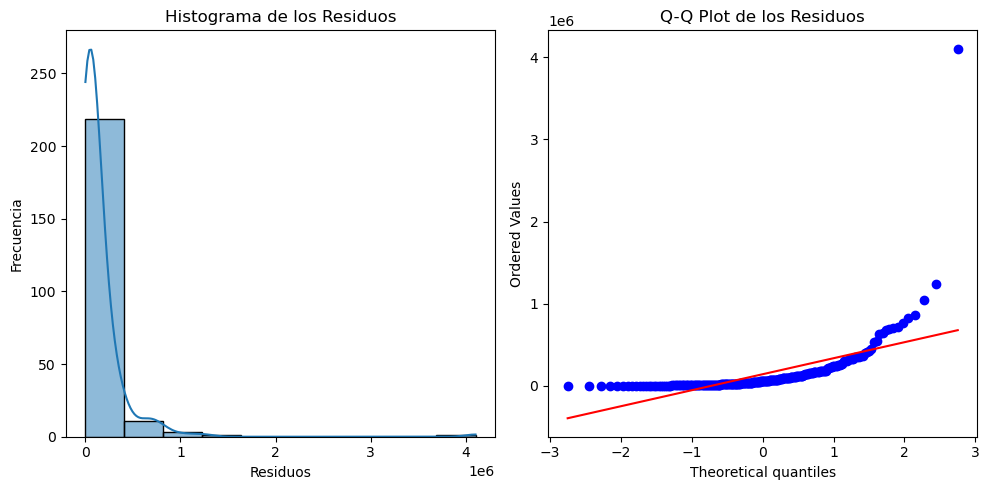

In [104]:
# Graficar el histograma de los residuos
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True, bins=10)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Residuos')

# Graficar el Q-Q plot de los residuos
plt.subplot(1, 2, 2)
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de los Residuos')

plt.tight_layout()
plt.show()

In [92]:
std_residuos = np.std(residuos)
print(std_residuos)
umbral = 2 * std_residuos  # Por ejemplo, dos desviaciones estándar
print(umbral)

319686.7004768281
639373.4009536562


In [79]:
pred = np.abs(np.dot(cof, test_clean.values[0]) + intv)
print(pred)

7931.112203657154


In [80]:
res_prueba = sum(np.power((grupos_definitivos[2].RDT_AJUSTADO  -pred),2))
print(res_prueba)

2924711728.5972323


In [81]:
resta = ssr -res_prueba
print(resta)
    

-2891728453.739601


In [84]:
ssr

32983274.857631013

In [19]:
import  random
import numpy 
min_yield = 4688.310140  
max_yield = 8371.197827
np.random.seed(65)
numeros_aleatorios = [random.uniform(min_yield, max_yield) for _ in range(20)]

In [20]:
numeros_aleatorios

[5644.559878492611,
 6481.271714533917,
 4976.422403640756,
 6855.950535753059,
 6835.799406289971,
 5869.857607254851,
 6786.668758331103,
 5066.247439670711,
 6569.598562895835,
 5199.950913570279,
 6478.913173613811,
 8243.462892430185,
 7415.295226785043,
 5985.558691569133,
 8116.323994531103,
 6861.594452267898,
 7006.726327049961,
 6398.544314248463,
 6398.017718146965,
 7117.385372544923]